In [1]:
import numpy as np
import pandas as pd

import utils
from sklearn.metrics.pairwise import paired_distances
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 



In [3]:
pathname = utils.Save.savepath('ana_one_dot_action_plan_by_length')

In [2]:
subjs = utils.ExpInfo.getSubjIDs()
task = utils.ExpInfo.taskName[0]

# Compute dist by wSize and save data

In [147]:
# subj = subjs[48]

def group(subj):
    dist = np.zeros((60, 6))
    dist_v = np.zeros((60, 6))
    wSizes = np.arange(10, 61, 10)
    for iSize, wSize in enumerate(wSizes):
        for iTrial in range(60):
            x, h, y = utils.LoadData.xhy(subj, task, wSize)
            x_disp, h_disp, y_disp = utils.LoadData.xhy_disp(subj, task, wSize)
            dist_ = paired_distances(h[iTrial][:-1, :], h_disp[iTrial]).mean()
            dist_v_ = paired_distances(np.diff(h[iTrial][:-1, :], axis=0),
                                    np.diff(h_disp[iTrial], axis=0)).mean()
            dist[iTrial, iSize] = dist_
            dist_v[iTrial, iSize] = dist_v_

    df_beh = utils.LoadData.behaviorData(subj, task)

    df_dist = pd.DataFrame(dist, columns=wSizes)
    df_ = pd.concat((df_beh, df_dist), axis=1)
    df_ = df_.melt(id_vars=df_beh.columns, value_vars=wSizes, var_name='wSize', value_name='dist')

    df_dist_v = pd.DataFrame(dist_v, columns=wSizes)
    df_v_ = pd.concat((df_beh, df_dist_v), axis=1)
    df_v_ = df_v_.melt(id_vars=df_beh.columns, value_vars=wSizes, var_name='wSize', value_name='dist_v')
    df_v_ = df_v_[['trial no.', 'wSize', 'dist_v']]

    df = pd.merge(df_, df_v_, on=['trial no.', 'wSize'])
    return df

df = utils.GroupOperation.map(group, subjs)
df = pd.concat(df, axis=0)
df.to_csv(pathname / 'dist.csv')

Group loop |████████████████████████████████████████| 50/50 [100%] in 28:10.6 (0.03/s)                                  


# Load data

In [4]:
df = pd.read_csv(pathname / 'dist.csv', index_col=0)

# Individual

In [5]:
subj = subjs[0]
df_ = df[df['participant'] == subj]

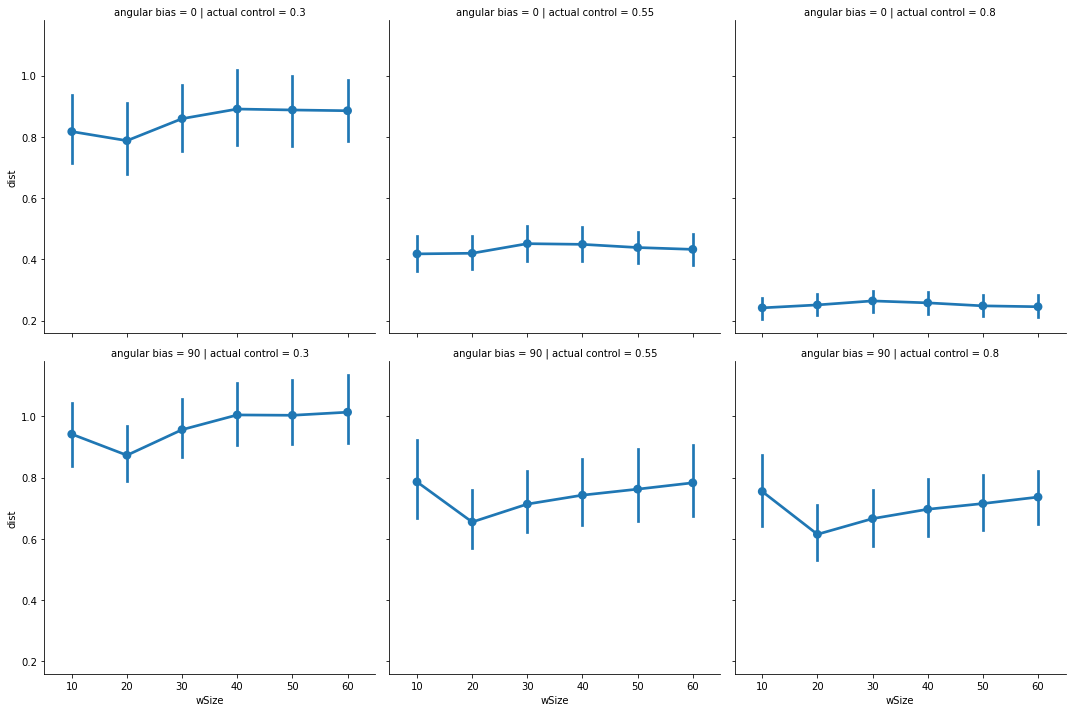

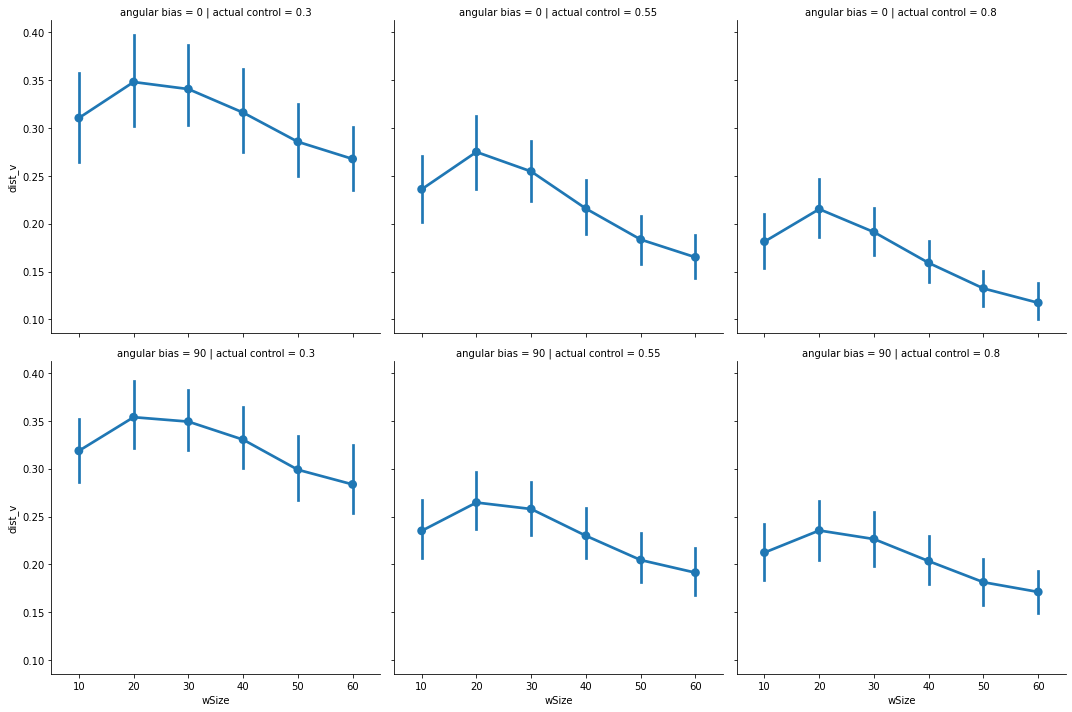

In [6]:
subj = subjs[18]
df_ = df[df['participant'] == subj]
sns.catplot(x='wSize', y='dist', 
            data=df_, kind='point', 
            col='actual control',
            row='angular bias')

sns.catplot(x='wSize', y='dist_v', 
            data=df_, kind='point', 
            col='actual control',
            row='angular bias')

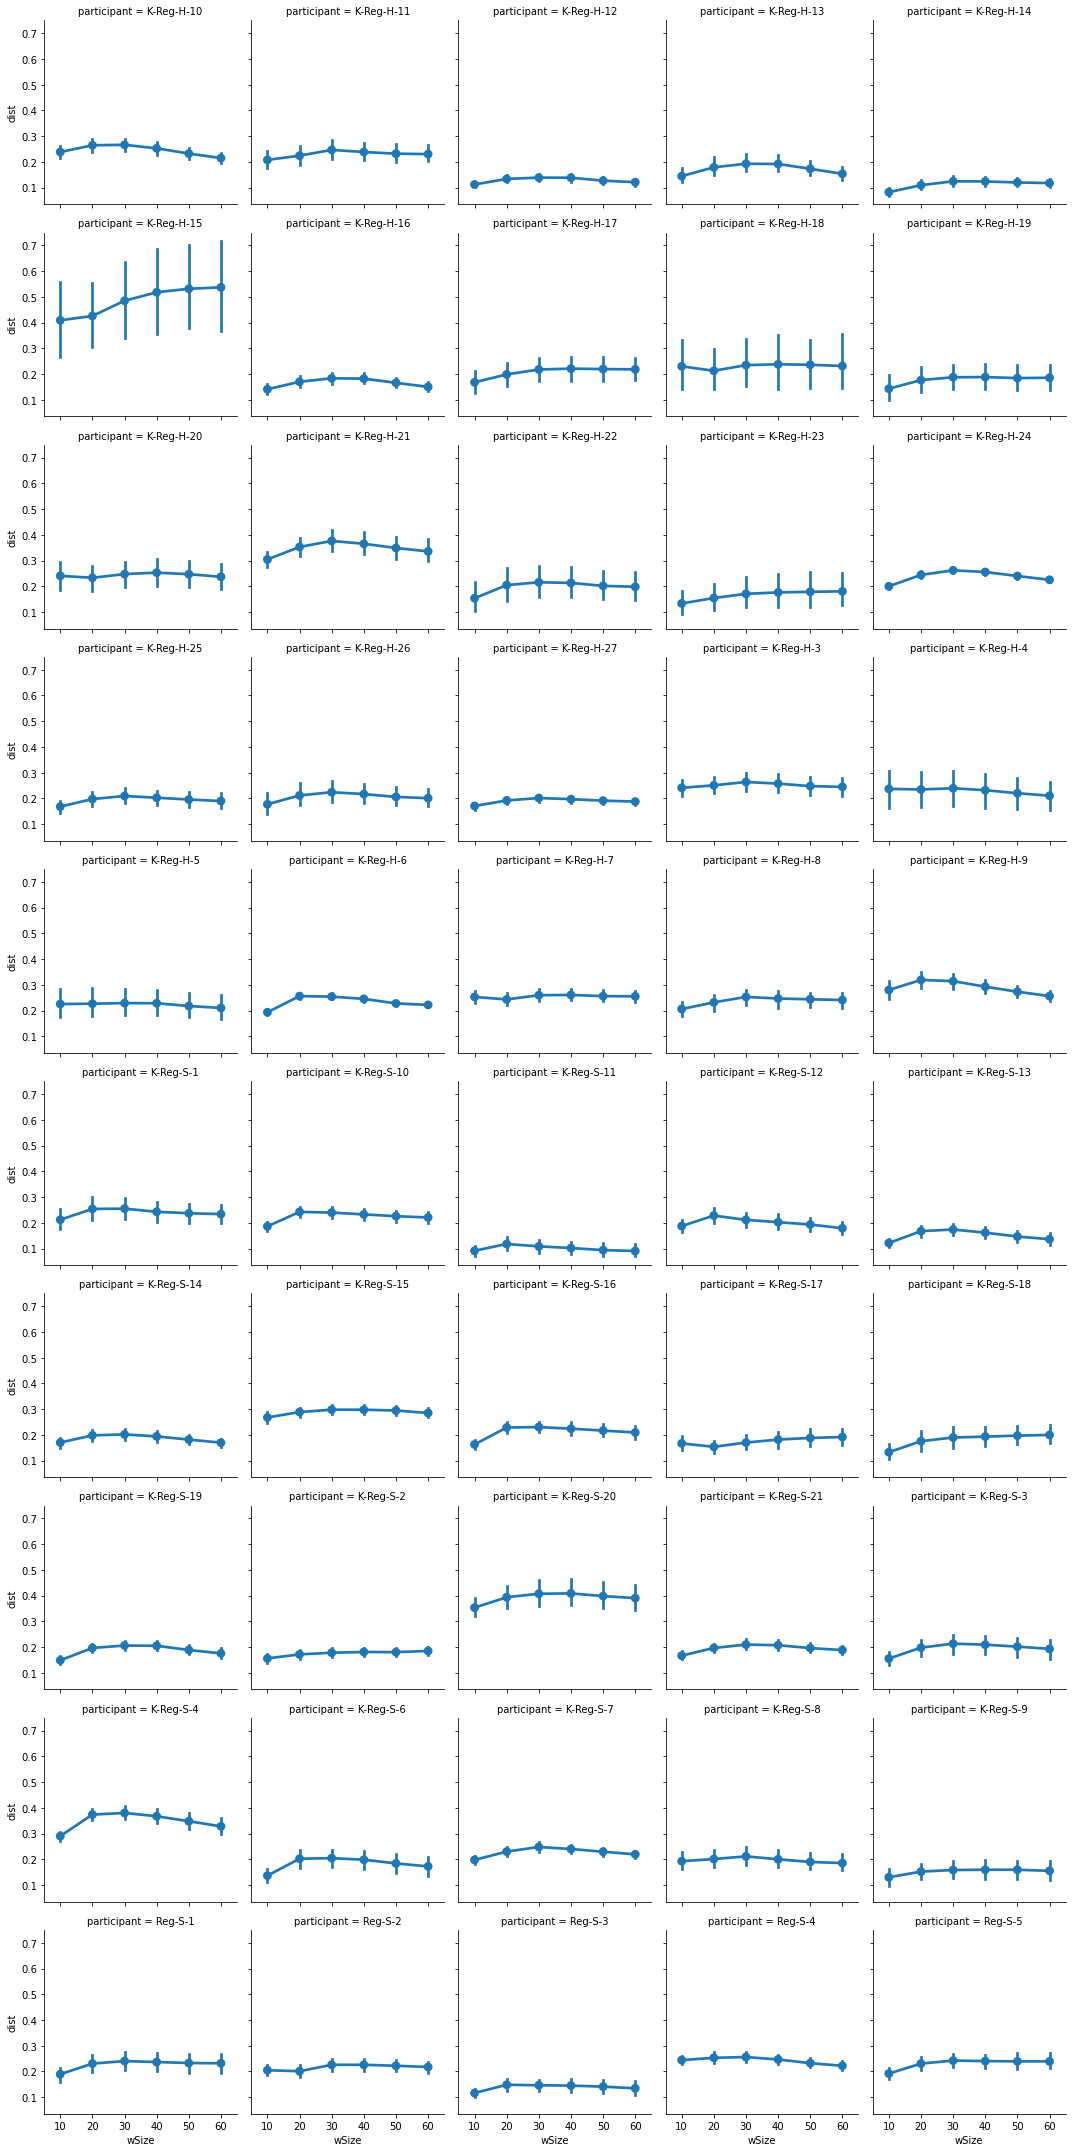

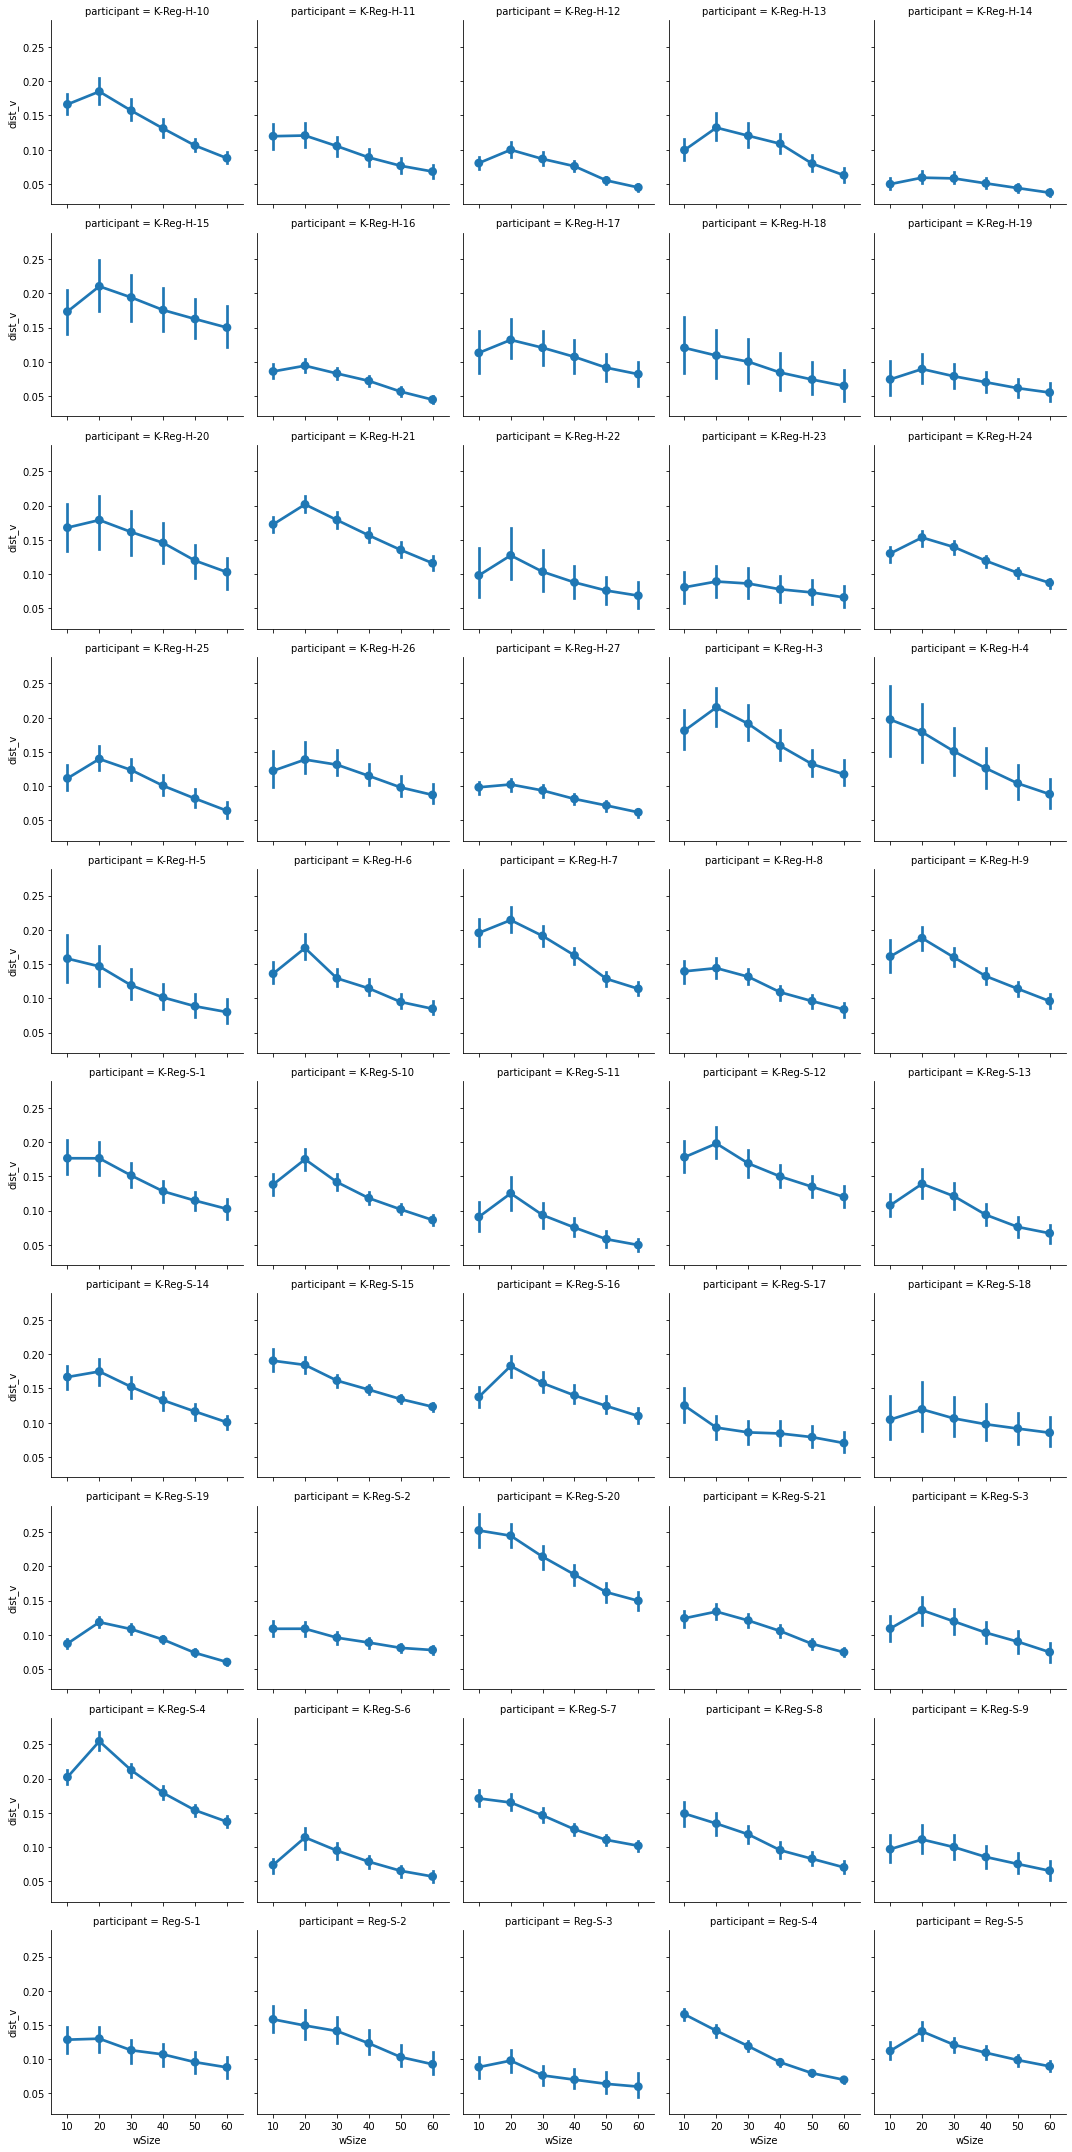

In [7]:
df_ = df.query('(`actual control`==0.8)&(`angular bias`==0)')

grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, x='wSize', y='dist')


grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_)
grid.map_dataframe(sns.pointplot, x='wSize', y='dist_v')

In [168]:
df.head()

,participant,trial no.,actual control,angular bias,response,group,wSize,dist,dist_v
0,K-Reg-H-10,1,0.30,0,0,H,10,0.558856,0.207402
1,K-Reg-H-10,2,0.80,0,1,H,10,0.185455,0.148080
2,K-Reg-H-10,3,0.30,0,0,H,10,0.590054,0.243275
3,K-Reg-H-10,4,0.55,90,0,H,10,0.864003,0.243625
4,K-Reg-H-10,5,0.30,90,0,H,10,0.926009,0.308803


# individual

In [138]:
subj = subjs[48]

dist = np.zeros((60, 6))
dist_v = np.zeros((60, 6))
wSizes = np.arange(10, 61, 10)
for iSize, wSize in enumerate(wSizes):
    for iTrial in range(60):
        x, h, y = utils.LoadData.xhy(subj, task, wSize)
        x_disp, h_disp, y_disp = utils.LoadData.xhy_disp(subj, task, wSize)
        dist_ = paired_distances(h[iTrial][:-1, :], h_disp[iTrial]).mean()
        dist_v_ = paired_distances(np.diff(h[iTrial][:-1, :], axis=0),
                                   np.diff(h_disp[iTrial], axis=0)).mean()
        dist[iTrial, iSize] = dist_
        dist_v[iTrial, iSize] = dist_v_

# dist = np.array(dist)
# plt.plot(wSizes, dist)

In [139]:
df_beh = utils.LoadData.behaviorData(subj, task)

In [140]:
df_dist = pd.DataFrame(dist, columns=wSizes)
df_ = pd.concat((df_beh, df_dist), axis=1)
df_ = df_.melt(id_vars=df_beh.columns, value_vars=wSizes, var_name='wSize', value_name='dist')

df_dist_v = pd.DataFrame(dist_v, columns=wSizes)
df_v_ = pd.concat((df_beh, df_dist_v), axis=1)
df_v_ = df_v_.melt(id_vars=df_beh.columns, value_vars=wSizes, var_name='wSize', value_name='dist_v')
df_v_ = df_v_[['trial no.', 'wSize', 'dist_v']]



In [141]:
df = pd.merge(df_, df_v_, on=['trial no.', 'wSize'])

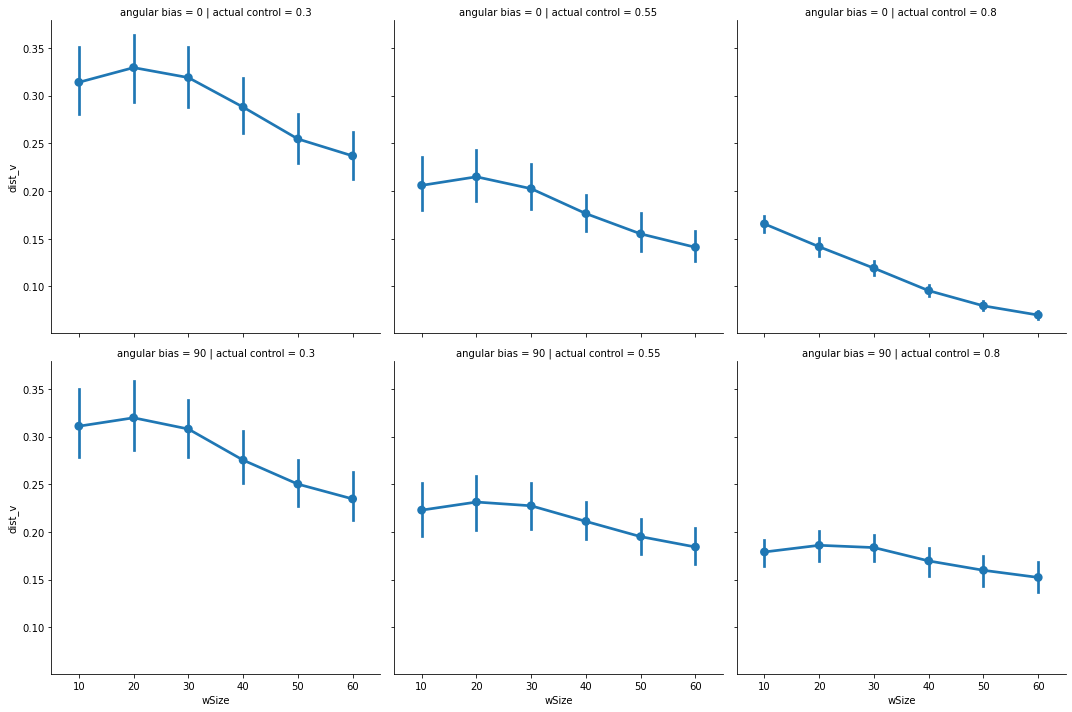

In [144]:
sns.catplot(x='wSize', y='dist_v', 
            data=df, kind='point', 
            col='actual control',
            row='angular bias')